Multiple dispatch feature of Julia -- material
==============================================

**Date:** [2023-05-20 Sat 20:35]



## Two species



In [3]:
using DifferentialEquations, Plots

abstract type Species end

struct Predator <: Species
    name::String
    death_rate::Float64
    predation_rate::Float64
end

struct Prey <: Species
    name::String
    growth_rate::Float64
    vulnerability::Float64
end

function simulate_ecosystem(predators::Vector{Predator}, preys::Vector{Prey}, tspan::Tuple{Float64, Float64}, initial_conditions::Vector{Float64})
    function dXdt!(dX, X, p, t)
        num_predators = length(predators)
        num_preys = length(preys)
        total_predator_populations = sum(X[1:num_predators])
        total_prey_populations = sum(X[num_predators+1:end])
        # total_prey_population = sum(prey_populations)
        for i in 1:num_predators
            predator = predators[i]
            predation_rate = predator.predation_rate
            death_rate = predator.death_rate
            dX[i] = - death_rate * X[i] + predation_rate * total_prey_populations * X[i]
        end

        for j in 1:num_preys
            prey = preys[j]
            # prey_population_at_t = prey_populations[j]
            growth_rate = prey.growth_rate
            vulnerability = prey.vulnerability
            dX[num_predators + j] = growth_rate * X[num_predators + j] - vulnerability * total_predator_populations * X[num_predators + j]
        end
    end

    prob = ODEProblem(dXdt!, initial_conditions, tspan)
    sol = solve(prob, Tsit5())
    return sol
end

simulate_ecosystem (generic function with 1 method)

### Two predators and one prey



In [4]:
predators = [Predator("Lion", 0.4, 0.1), Predator("Fox", 0.3, 0.1)]
preys = [Prey("Rabbit", 1.1, 0.4)]

tspan = (0.0, 500.0)
initial_conditions = [50.0, 50.0, 50.0]  # Initial predator and prey populations

sol = simulate_ecosystem(predators, preys, tspan, initial_conditions);

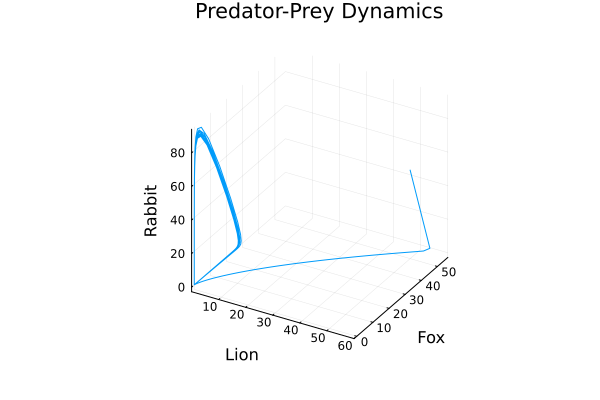

In [5]:
num_predators = length(predators)
num_preys = length(preys)
plot(sol, idxs=(1,2,3), xlabel="Lion", ylabel="Fox", zlabel="Rabbit", label="", title="Predator-Prey Dynamics")

### One predator and one prey



In [6]:
predators = [Predator("Lion", 0.4, 0.1)]
preys = [Prey("Rabbit", 1.1, 0.4)]

tspan = (0.0, 500.0)
initial_conditions = [50.0, 50.0]  # Initial predator and prey populations

sol = simulate_ecosystem(predators, preys, tspan, initial_conditions);

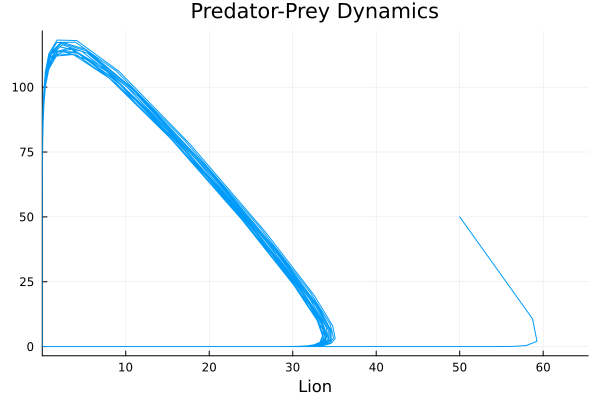

In [7]:
plot(sol, idxs=(1,2), xlabel="Lion", zlabel="Rabbit", label="", title="Predator-Prey Dynamics")

## Add Plants



In [8]:
struct Plant <: Species
    name::String
    growth_rate::Float64
    vulnerability::Float64
end

In [9]:
function simulate_ecosystem(predators::Vector{Predator}, preys::Vector{Prey}, plants::Vector{Plant}, tspan::Tuple{Float64, Float64}, initial_conditions::Vector{Float64})
    function dXdt!(dX, X, p, t)
        num_predators = length(predators)
        num_preys = length(preys)
        num_plants = length(plants)
        total_predator_populations = sum(X[1:num_predators])
        total_prey_populations = sum(X[num_predators + 1:end])
        total_plant_populations = sum(X[(num_predators + num_preys + 1):end])
        # total_prey_population = sum(prey_populations)
        for i in 1:num_predators
            predator = predators[i]
            predation_rate = predator.predation_rate
            death_rate = predator.death_rate
            dX[i] = - death_rate * X[i] + predation_rate * total_prey_populations * X[i]
        end

        for j in 1:num_preys
            prey = preys[j]
            # prey_population_at_t = prey_populations[j]
            growth_rate = prey.growth_rate
            vulnerability = prey.vulnerability
            dX[num_predators + j] = growth_rate * X[num_predators + j] * total_plant_populations - vulnerability * total_predator_populations * X[num_predators + j]
        end

        for k in 1:num_plants
            plant = plants[k]
            growth_rate = plant.growth_rate
            vulnerability = plant.vulnerability
            dX[num_predators + num_preys + k] = - vulnerability * total_prey_populations * X[num_predators + num_preys + k] + growth_rate * X[num_predators + num_preys + k]
         end
    end

    prob = ODEProblem(dXdt!, initial_conditions, tspan)
    sol = solve(prob, Tsit5())
    return sol
end

simulate_ecosystem (generic function with 2 methods)

In [10]:
predators = [Predator("Lion", 0.4, 0.1)]
preys = [Prey("Rabbit", 1.1, 0.4)]
plants = [Plant("Grass", 1.2, 0.4)] 

tspan = (0.0, 500.0)
initial_conditions = [50.0, 50.0, 20.]  # Initial predator and prey populations

sol = simulate_ecosystem(predators, preys, plants, tspan, initial_conditions);

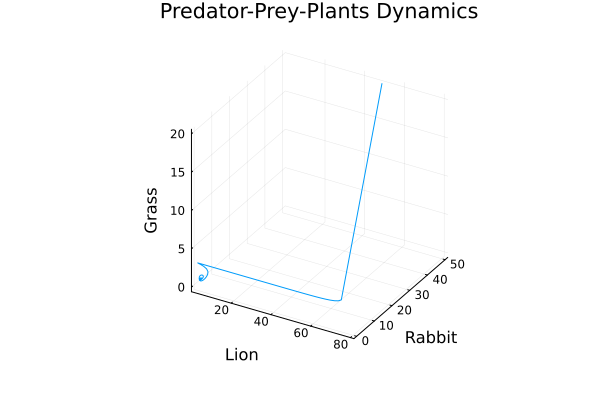

In [11]:
plot(sol, idxs=(1,2,3), xlabel="Lion", ylabel="Rabbit", zlabel="Grass", label="", title="Predator-Prey-Plants Dynamics")